In [1]:
import os

In [2]:
# os.environ['CUDA_VISIBLE_DEVICES']='-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
from ase.optimize import BFGS, FIRE
from ase.filters import FrechetCellFilter

In [5]:
from tensorpotential.calculator.foundation_models import grace_fm, GRACEModels

[tensorpotential] Info: Environment variable TF_USE_LEGACY_KERAS is automatically set to '1'.


E0000 00:00:1772198869.441832  691965 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772198869.445255  691965 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772198869.454511  691965 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772198869.454521  691965 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772198869.454522  691965 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772198869.454523  691965 computation_placer.cc:177] computation placer already registered. Please check linka

In [6]:
from ase.build import bulk
from ase.phonons import Phonons

In [7]:
from amstools import *

# Load model

In [8]:
calc=grace_fm(GRACEModels.GRACE_1L_OMAT_medium_ft_E)

Using cached GRACE model from /pc2/users/u/usrtr200/.cache/grace/GRACE-1L-OMAT-medium-ft-E
Model license: Academic Software License


In [9]:
at=bulk('W')

In [10]:
at.calc=calc

In [11]:
at.get_potential_energy()

I0000 00:00:1772198878.408329  691965 service.cc:152] XLA service 0xc005b30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772198878.408364  691965 service.cc:160]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1772198879.367623  691965 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


np.float64(-12.939411197148786)

In [12]:
# BFGS(FrechetCellFilter(at)).run()

In [13]:
pipe=(
    NearestNeighboursExpansionCalculator() + 
    MurnaghanCalculator() + 
    ElasticMatrixCalculator() + 
    PhonopyCalculator()
)

In [14]:
pipe.run(at,calc,verbose=True)

2026-02-27 14:27:59,416 - root - INFO - =======================
2026-02-27 14:27:59,417 - root - INFO - Step: energy_nn_distance
Processing: nndist_4_9500 (1 atom(s)): 100%|██████████| 60/60 [00:01<00:00, 55.94it/s]
2026-02-27 14:28:00,502 - root - INFO - Job is done
2026-02-27 14:28:00,503 - root - INFO - Step status: finished
2026-02-27 14:28:00,503 - root - INFO - =======================
2026-02-27 14:28:00,503 - root - INFO - =======================
2026-02-27 14:28:00,503 - root - INFO - Step: murnaghan
Processing: strain_1_1 (1 atom(s)): 100%|██████████| 11/11 [00:00<00:00, 58.30it/s]      
2026-02-27 14:28:00,696 - root - INFO - Job is done
2026-02-27 14:28:00,696 - root - INFO - Step status: finished
2026-02-27 14:28:00,696 - root - INFO - =======================
2026-02-27 14:28:00,697 - root - INFO - =======================
2026-02-27 14:28:00,697 - root - INFO - Step: elastic_matrix
Processing: s_23_e_0_00250 (1 atom(s)):  46%|████▌     | 6/13 [00:00<00:00, 54.23it/s] 

      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.946576        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.943350        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.945777        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.945770        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.943383        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.944900        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.946161        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.946157        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.944918        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.944

Processing: s_23_e_0_00500 (1 atom(s)): 100%|██████████| 13/13 [00:00<00:00, 53.55it/s]
2026-02-27 14:28:00,952 - root - INFO - Job is done
2026-02-27 14:28:00,953 - root - INFO - Step status: finished
2026-02-27 14:28:00,953 - root - INFO - =======================
2026-02-27 14:28:00,953 - root - INFO - =======================
2026-02-27 14:28:00,953 - root - INFO - Step: phonons


      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.946087        0.000000
      Step     Time          Energy          fmax
BFGS:    0 14:28:00      -12.944655        0.000000


Processing: supercell_phonon_0 (64 atom(s)): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
2026-02-27 14:28:04,754 - root - INFO - Job is done
2026-02-27 14:28:04,754 - root - INFO - Step status: finished
2026-02-27 14:28:04,755 - root - INFO - =======================


2026-02-27 14:28:04,758 - root - INFO - Plotting step: energy_nn_distance


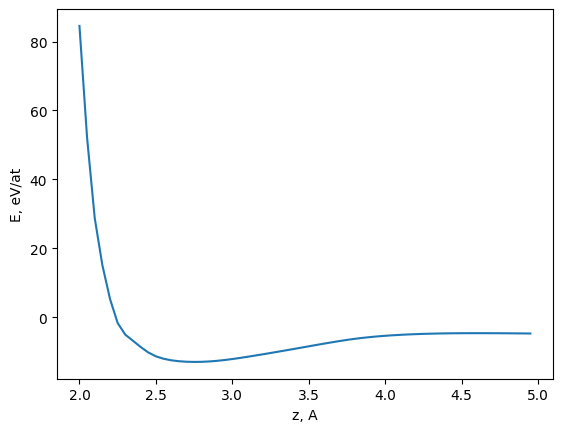

2026-02-27 14:28:04,842 - root - INFO - Plotting step: murnaghan


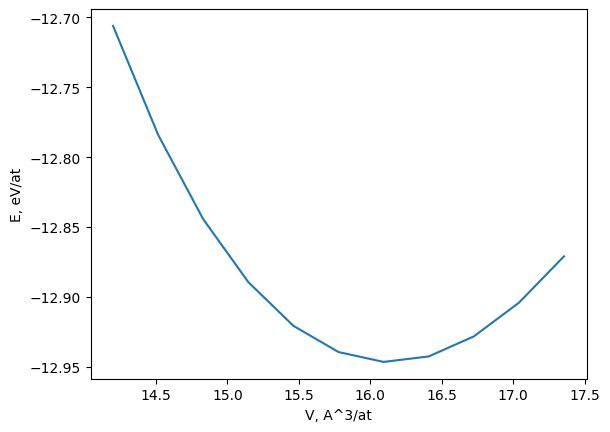

2026-02-27 14:28:04,907 - root - INFO - Plotting step: elastic_matrix


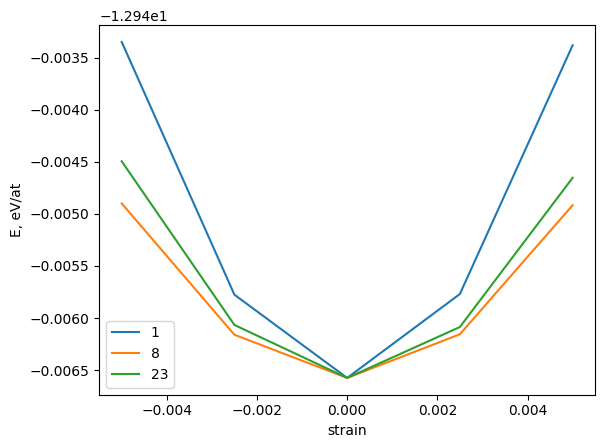

2026-02-27 14:28:04,987 - root - INFO - Plotting step: phonons


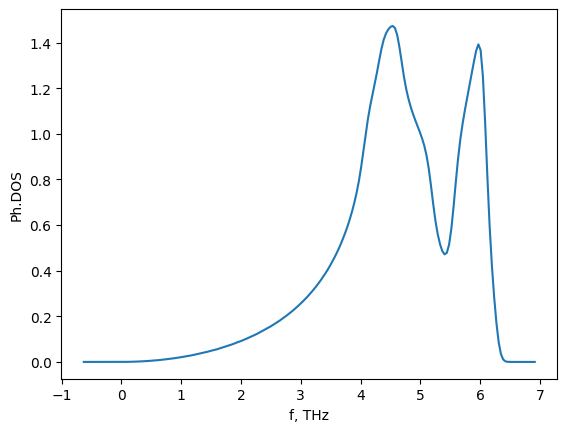

[<Axes: xlabel='z, A', ylabel='E, eV/at'>,
 <Axes: xlabel='V, A^3/at', ylabel='E, eV/at'>,
 <Axes: xlabel='strain', ylabel='E, eV/at'>,
 <Axes: xlabel='f, THz', ylabel='Ph.DOS'>]

In [15]:
pipe.plot()